In [ ]:
! pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:04<00:00, 41.4MB/s]
100% 163M/163M [00:04<00:00, 39.4MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
print("extraction done")

extraction done


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
# install required dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files=os.listdir("/content/data/with_mask")
without_mask_files=os.listdir("/content/data/without_mask")

In [ ]:
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_3149.jpg', 'with_mask_1620.jpg', 'with_mask_1759.jpg', 'with_mask_211.jpg', 'with_mask_3526.jpg']
['without_mask_856.jpg', 'without_mask_438.jpg', 'without_mask_3257.jpg', 'without_mask_2910.jpg', 'without_mask_1979.jpg']


In [ ]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


with mask---> 1

without mask---> 0

In [ ]:
# image processing
#create labels
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [ ]:
labels=with_mask_labels+without_mask_labels

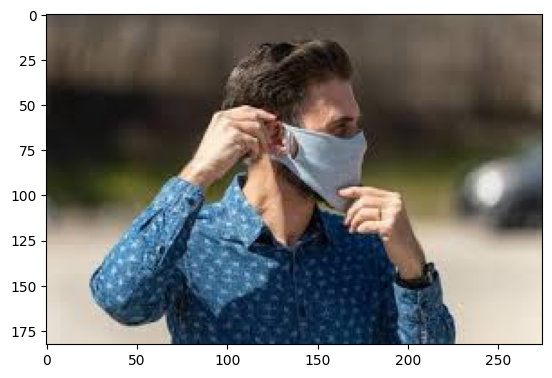

In [ ]:
# displaying  images
img=mpimg.imread("/content/data/with_mask/with_mask_2590.jpg")
imgplot=plt.imshow(img)
plt.show()

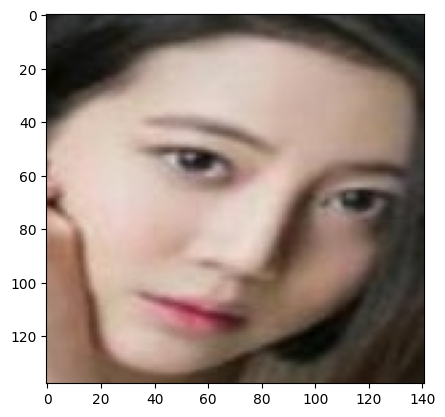

In [ ]:
# displaying  images
img=mpimg.imread("/content/data/without_mask/without_mask_438.jpg")
imgplot=plt.imshow(img)
plt.show()

In [ ]:
#resize and convert image to numpy array
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(len(labels))
print(len(data))

7553
7553


In [ ]:
#convert image list and label list to numpy array
X=np.array(data)
y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [ ]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
# building a CNN
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


In [ ]:
#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#training
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 25ms/step - loss: 0.4503 - acc: 0.7958 - val_loss: 0.2735 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2866 - acc: 0.8849 - val_loss: 0.2743 - val_acc: 0.8777
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2356 - acc: 0.9121 - val_loss: 0.2122 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1852 - acc: 0.9285 - val_loss: 0.2093 - val_acc: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1650 - acc: 0.9397 - val_loss: 0.2167 - val_acc: 0.9339


In [ ]:
# model evaluation

loss,accuracy=model.evaluate(X_test_scaled,y_test)
print(loss,accuracy)

48/48 [==============================] - 1s 14ms/step - loss: 0.2262 - acc: 0.9153
0.22617174685001373 0.9152879118919373


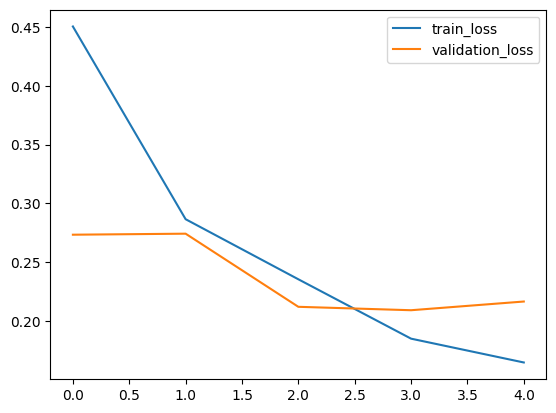

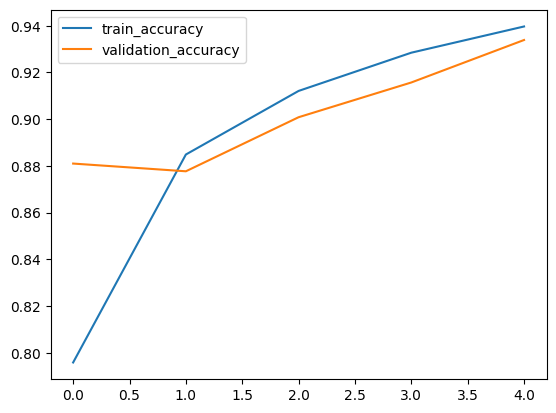

In [ ]:
h=history
#loss
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()
#accuracy
plt.plot(h.history['acc'],label='train_accuracy')
plt.plot(h.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.show()


In [ ]:
model.save("mask_prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#predictive system
input_image_path=input("enterpath")
imput_imagecv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
pred=model.predict(input_image_scaled)
input_pred_label=np.argmax(pred)
print(input_pred_label)